# Import modules

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Basic map 

In this tutorial, we will be showing how to plot data on top of a map in many different ways. So then, let's make a function to make a basic map of Japan that we can use over and over again.

In [3]:
def basic_Japan_map():
    
    fig, ax = plt.subplots(figsize=(8,8))

    proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                    # this one is the standard for geographic coordinates

    ax = plt.axes(projection=proj)                  # sets the projection

    ax.coastlines(resolution='50m')                 # the level of resolution to render the drawings, 
                                                    # see documentation for more details

    ax.set_xlim(125,150)                            # set the longitude limits for the map

    ax.set_ylim(28,48)                              # set the latitude limits for the map

    gl = ax.gridlines(crs=ccrs.PlateCarree()        
                    , draw_labels=True              # label coordinates
                    , linewidth=0                   # line properties can be changed similar to matplotlib
                    , color='gray'
                    , alpha=0.5
                    , linestyle='--')

    gl.xlabels_top = gl.ylabels_right = False                        # where labels shouldn't be
    gl.xlocator = mticker.FixedLocator(np.arange(130,151,10))        # sets longitude tick marks
    gl.ylocator = mticker.FixedLocator(np.arange(30,50,10))          # sets latitude tick marks using numpy module
    gl.xformatter = LONGITUDE_FORMATTER                              # set cartopy formatting
    gl.yformatter = LATITUDE_FORMATTER

    gl.xlabel_style = {'size': 15}                                   # change label font sizes
    gl.ylabel_style = {'size': 15}
    
    return fig, ax, proj

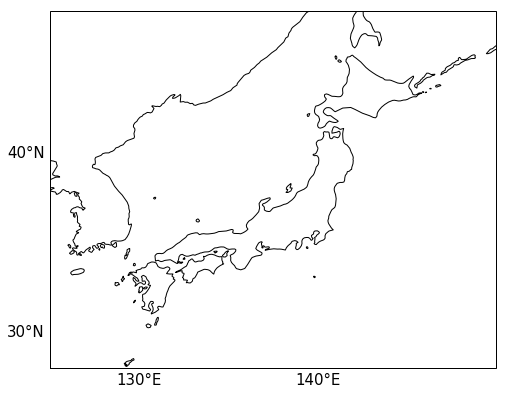

In [4]:
# plot our basic Japan map
fig, ax, proj = basic_Japan_map()

Now that we have a function that creates a basic map we can call the function <i>basic_Japan_map(  )</i> any time we would like to add data to it.

# Contour plot - Linear scale

We will first create a linear scaled contour plot on top of our basic Japan map.

Let's create some random data for lon/lat coordinates of Japan.

In [5]:
npoints = 2000                                  
lons = np.random.uniform(125, 150, npoints)
lats = np.random.uniform(28, 48, npoints)
data = np.random.uniform(0.5, 1.5, npoints)

# print some of the points and data to the screen
print(lons[0:5])
print(lats[0:5])
print(data[0:5])

[ 135.28200438  135.58243252  145.01352048  132.69563909  130.47852368]
[ 35.86913617  35.95732725  42.97463051  47.57310787  40.29980387]
[ 0.66438182  1.00968846  1.49315698  0.82277708  1.1735834 ]


As you can see, the x and y points (lons, lats) are not regularly spaced. Therefore, we need to define a grid for mapping our randomly spaced data and then we will interpolate our data to this grid. 

<u>Some things to remember about interpolation:</u>

Interpolation is necessary when data are not at grid intersections, or are irregular or sparse. 

Interpolation becomes extrapolation 1) when areas deficient of points are interpolated, and 2) when interpolation is carried outside the data area. 

In [6]:
# define a regularly spaced grid
xi  = np.linspace(125, 150, (150-125)+1)        
yi = np.linspace(28, 48, (48 - 28)+1)

# print some of the new grid to the screen 
print(xi[0:5])
print(yi[0:5])

[ 125.  126.  127.  128.  129.]
[ 28.  29.  30.  31.  32.]


Oh that looks a lot better for plotting! 

Now, we can map our random data to this grid using interpolation. There are many types of interpolation. Your style choice of interpolation affects the result. For more information about interpolation choices and their affects, see [this page](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.griddata.html).

Here, we will use a linear interpolation for gridding our randomly spaced data. 

In [7]:
# grid the randomly spaced data 
zi = griddata(lons, lats, data
            , xi, yi, interp='linear')            

Now, that we have our data interpolated to a regularly spaced grid we can add it to a map.

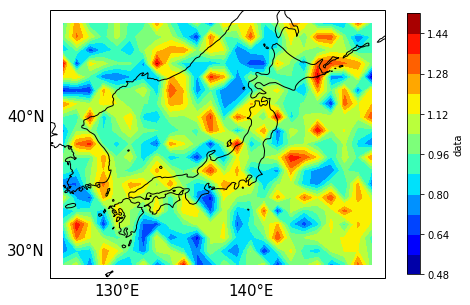

In [8]:
fig, ax, proj = basic_Japan_map()               # make our basic Japan map

cbar = ax.contourf(xi,yi,zi                     # plot the contours
            , 15                                # number of levels
            , cmap=plt.cm.jet                   # colormap
            , transform=proj)                   # projection to plot data in

fig.colorbar(cbar                               # add a colorbar
            , label='data'                      # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              

# Contour plot - Log scale

What if we want our data to be plotted in log scale?  We will need to import <i>ticker</i> from the <i>matplotlib</i> module for this.

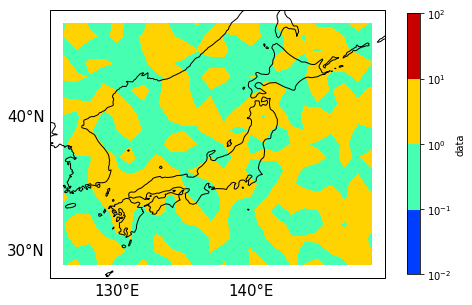

In [9]:
from matplotlib import ticker                   # import ticker

fig, ax, proj = basic_Japan_map()               # make our basic Japan map

cbar = ax.contourf(xi,yi,zi                     # plot the contours
            , 15                                # number of levels
            , cmap=plt.cm.jet                   # colormap
            , locator=ticker.LogLocator()       # set scale as log for z-axis ticks
            , transform=proj)                   # projection to plot data in

fig.colorbar(cbar                               # add a colorbar
            , label='data'                      # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              


# Block plot - Linear scale

What if we want our data to be plotted in regularly defined mesh without smoothing between blocks?

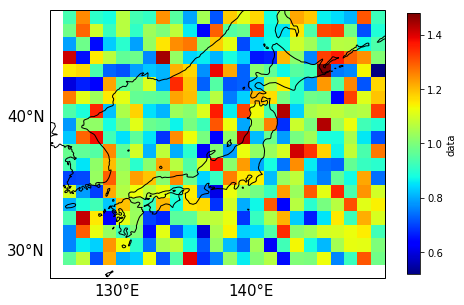

In [10]:
fig, ax, proj = basic_Japan_map()               # make our basic Japan map

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh
              , cmap=plt.cm.jet                 # colormap
              , transform=proj)                 # projection to plot data in                    

fig.colorbar(cbar                               # add a colorbar
            , label='data'                      # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              

# Block plot - Log scale

What if we want our data to be plotted in a regularly defined mesh without smoothing between blocks but in a log scale? In this case, we would need to import <i>LogNorm</i> from the <i>matplotlib.colors</i> module.

/Users/caiken/anaconda3/envs/cartopy/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


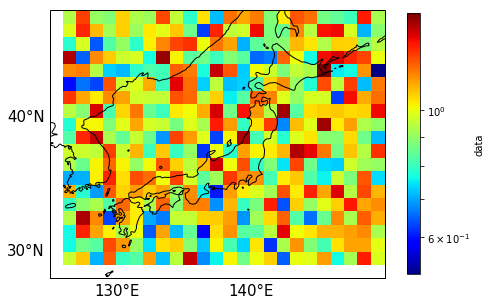

In [11]:
from matplotlib.colors import LogNorm           # import LogNorm

fig, ax, proj = basic_Japan_map()               # make our basic Japan map

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh
              , vmin=np.min(zi)
              , vmax=np.max(zi)
              , cmap=plt.cm.jet                 # colormap
              , norm=LogNorm()                  # set scale as log for z-axis ticks
              , transform=proj)                 # projection to plot data in                    

fig.colorbar(cbar                               # add a colorbar
            , label='data'                      # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              

# Plotting with real earthquake data

Let's work some real earthquake data, but first we need to prepare it.

In [22]:
# read some earthquake data from the Advanced National Seismic System
df = pd.read_csv('data/anss.csv', delim_whitespace=True)

# cut the data around Japan
df = df[df.Lon.between(125, 150) & df.Lat.between(28, 48)].copy()
        
# count the number of earthquakes in each rounded latitude/longitude pair
eq_count = df.groupby(['Lat', 'Lon']).apply(round).groupby(['Lat','Lon']).count().reset_index()

# define the grid
x_i = np.linspace(125, 150, (150 - 125) + 1)
y_i = np.linspace(28, 48, (48 - 28) + 1)

# redefine the input for contour plot
data = eq_count.Mag.values
lons = eq_count.Lon.values
lats = eq_count.Lat.values

# grid the randomly spaced data 
zi = griddata(lons, lats, data
            , xi, yi, interp='linear') 

# Plotting real earthquake data as contours

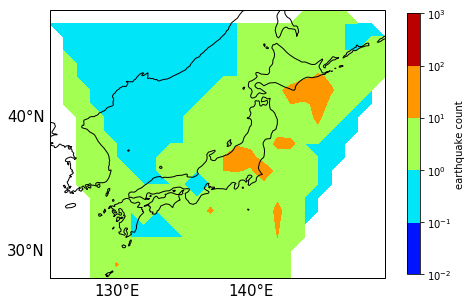

In [35]:
from matplotlib import ticker                   # import ticker

fig, ax, proj = basic_Japan_map()               # make our basic Japan map

cbar = ax.contourf(xi,yi,zi                     # plot the contours
            , 15                                # number of levels
            , cmap=plt.cm.jet                   # colormap
            , locator=ticker.LogLocator()       # set scale as log for z-axis ticks
            , transform=proj)                   # projection to plot data in

fig.colorbar(cbar                               # add a colorbar
            , label='earthquake count'          # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              


# Plotting real earthquake data as box plot

/Users/caiken/anaconda3/envs/cartopy/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


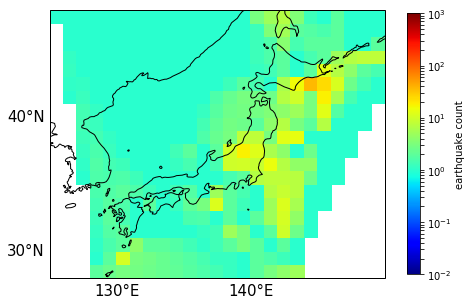

In [36]:
from matplotlib.colors import LogNorm           # import LogNorm

fig, ax, proj = basic_Japan_map()               # make our basic Japan map

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh
              , vmin=1e-2                       # to match contour plot above
              , vmax=1e3
              , cmap=plt.cm.jet                 # colormap
              , norm=LogNorm()                  # set scale as log for z-axis ticks
              , transform=proj)                 # projection to plot data in                    

fig.colorbar(cbar                               # add a colorbar
            , label='earthquake count'          # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.05)                         # padding between cax and ax will be fixed at 0.05 inch)                              

# Plotting real earthquake data without interpolation

The <i>griddata</i> function uses interpolation to make our data 'neat'. However, we can also use Pandas dataframes to make our data 'neat' without interpolation, and make it look like a matrix.

In [19]:
# create new indices 
from itertools import product
new_index = [x for x in product(lon_i, lat_i)]

# set the indices and columns to be the longitude and latitude pairs
# keep only the latitude, longitude, and magnitude information
bdata = eq_count.set_index(['Lon', 'Lat']).reindex(new_index).reset_index()[['Lon', 'Lat', 'Mag']].copy()

# pivot the data for plotting
zi = bdata.pivot(index='Lat', columns='Lon', values='Mag').values

Now let's plot the data...

/Users/caiken/anaconda3/envs/cartopy/lib/python3.6/site-packages/matplotlib/colors.py:929: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


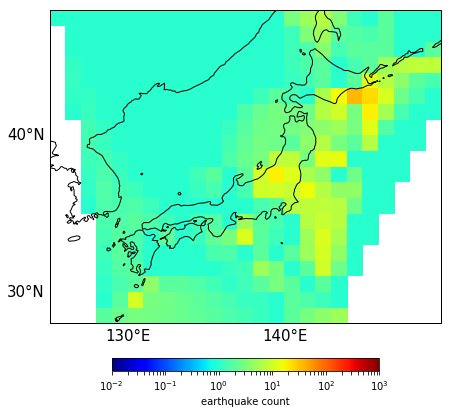

In [37]:
# begin making the plot 
from matplotlib.colors import LogNorm           # import LogNorm

fig, ax, proj = basic_Japan_map()               # make our basic Japan map

xi, yi = np.meshgrid(lon_i, lat_i)              # create a regularly spaced meshgrid for plotting the z values on

zi = np.ma.masked_invalid(zi)                   # mask invalid z values

cbar = ax.pcolormesh(xi, yi, zi                 # plot color mesh
              , vmin=1e-2                       # to match contour plot above
              , vmax=1e3
              , cmap='jet'                      # colormap
              , norm=LogNorm()                  # set scale as log for z-axis ticks
              , transform=proj)                 # projection to plot data in


fig.colorbar(cbar                               # add a colorbar
            , orientation='horizontal'          # orientation of the colorbar 
            , label='earthquake count'          # colorbar label
            , fraction=0.2                      # fraction of original axes to use for colorbar
            , shrink=0.6                        # fraction by which to shrink the colorbar
            , pad=0.08)                         # padding between cax and ax will be fixed at 0.08 inch)                              

The result is similar to box plot above.